<a href="https://colab.research.google.com/github/Aman78695/Phising_Website_Detection/blob/main/Copy_of_Website_Email_Phising_Detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/urlset.csv',encoding='latin-1',error_bad_lines=False)

<ipython-input-6-d547ff97d4a0>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('/content/urlset.csv',encoding='latin-1',error_bad_lines=False)
Skipping line 18259: expected 14 fields, saw 15
Skipping line 18273: expected 14 fields, saw 15

<ipython-input-6-d547ff97d4a0>:1: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/urlset.csv',encoding='latin-1',error_bad_lines=False)


In [ ]:
df.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1.0


In [ ]:
df.shape

(96005, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96005 entries, 0 to 96004
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96005 non-null  object 
 1   ranking        95953 non-null  object 
 2   mld_res        95935 non-null  object 
 3   mld.ps_res     95924 non-null  object 
 4   card_rem       95923 non-null  float64
 5   ratio_Rrem     95923 non-null  float64
 6   ratio_Arem     95923 non-null  float64
 7   jaccard_RR     95922 non-null  float64
 8   jaccard_RA     95921 non-null  float64
 9   jaccard_AR     95920 non-null  float64
 10  jaccard_AA     95919 non-null  float64
 11  jaccard_ARrd   95919 non-null  object 
 12  jaccard_ARrem  95917 non-null  object 
 13  label          95913 non-null  float64
dtypes: float64(8), object(6)
memory usage: 10.3+ MB


In [ ]:
df.isnull().sum()

domain            0
ranking          52
mld_res          70
mld.ps_res       81
card_rem         82
ratio_Rrem       82
ratio_Arem       82
jaccard_RR       83
jaccard_RA       84
jaccard_AR       85
jaccard_AA       86
jaccard_ARrd     86
jaccard_ARrem    88
label            92
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['label'].value_counts()

0.0    48009
1.0    47903
Name: label, dtype: int64

##Univariate Analysis

What is the distribution of domain rankings?

In [ ]:
domain_ranking=df['domain']

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(y=domain_ranking, color='skyblue', order=domain_ranking.value_counts().index)
plt.title('Count of Domain Rankings')
plt.xlabel('Frequency')
plt.ylabel('Domain Ranking')
plt.show()


In [ ]:
# plt.figure(figsize=(8, 6))
# plt.hist(domain_ranking, bins=10, color='skyblue', edgecolor='black')
# plt.title('Distribution of Domain Rankings')
# plt.xlabel('Domain Ranking')
# plt.ylabel('Frequency')

Outliers or extreme values in domain rankings?

<Figure size 800x600 with 0 Axes>

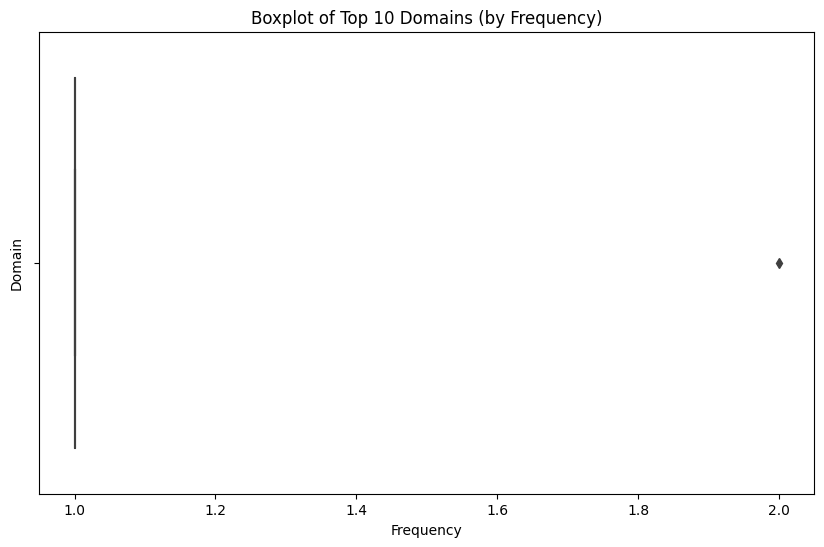

In [ ]:
plt.figure(figsize=(8, 6))
domain_counts = df['domain'].value_counts()
top_domains = domain_counts.head(10)    #top 10 most frequent domains


#boxplot using counts of the top domains
plt.figure(figsize=(10, 6))
sns.boxplot(x=top_domains.values)
plt.title('Boxplot of Top 10 Domains (by Frequency)')
plt.xlabel('Frequency')
plt.ylabel('Domain')
plt.show()

##Metrics,descriptive statistics (mean, median, min, max, etc.) of (mld_res, mld.ps_res, card_rem, ratio_Rrem, ratio_Arem)

<Figure size 1000x600 with 0 Axes>

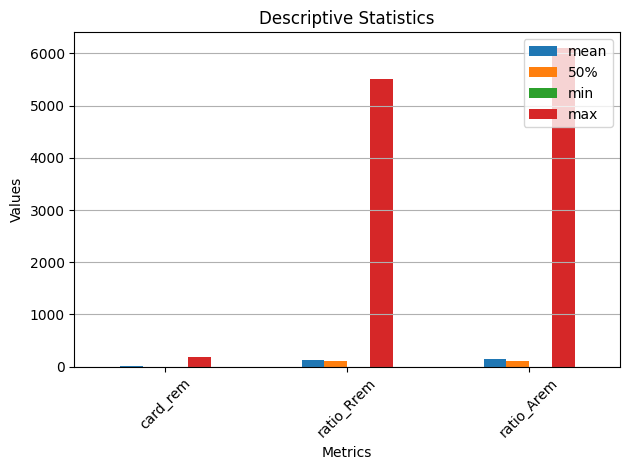

In [ ]:
df_statics=df[['mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem', 'ratio_Arem']]
statistics=df_statics.describe().transpose()
plt.figure(figsize=(10, 6))
statistics[['mean', '50%', 'min', 'max']].plot(kind='bar', stacked=False)
plt.title('Descriptive Statistics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
df_statics.describe()

,card_rem,ratio_Rrem,ratio_Arem
count,95922.000000,95922.000000,95922.000000
mean,4.580504,135.253447,138.542418
std,4.466096,160.988818,175.480522
min,0.000000,0.000000,0.000000
25%,2.000000,43.000000,39.666667
50%,3.000000,104.000000,103.333333
75%,6.000000,174.142857,178.276786
max,187.333333,5507.000000,6097.000000


Checking for Missing Values:

In [ ]:
df_statics.isnull().sum()

mld_res       70
mld.ps_res    81
card_rem      82
ratio_Rrem    82
ratio_Arem    82
dtype: int64

Visualization of Missing Values

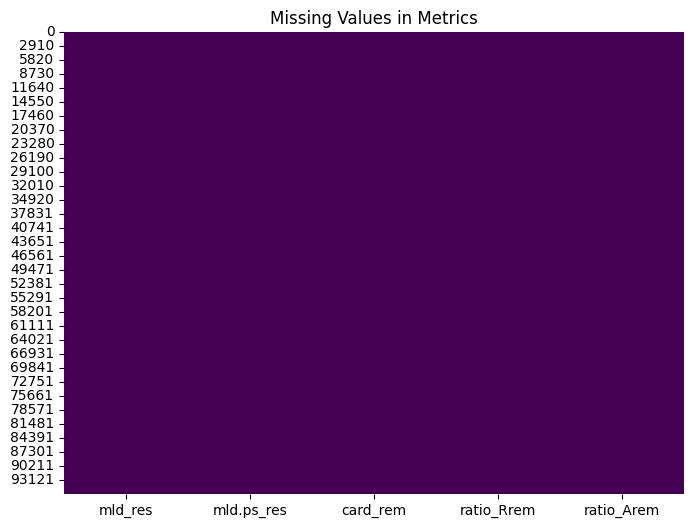

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_statics.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in Metrics')
plt.show()

Checking for Inconsistencies or Unique Values:

In [ ]:
df_statics.nunique()

mld_res          21
mld.ps_res       10
card_rem         53
ratio_Rrem    10042
ratio_Arem    10231
dtype: int64

##Jaccard Similarity Metrics:

In [ ]:
df_jaccard=df[['jaccard_RR',	'jaccard_RA',	'jaccard_AR',	'jaccard_AA',	'jaccard_ARrd',	'jaccard_ARrem']]

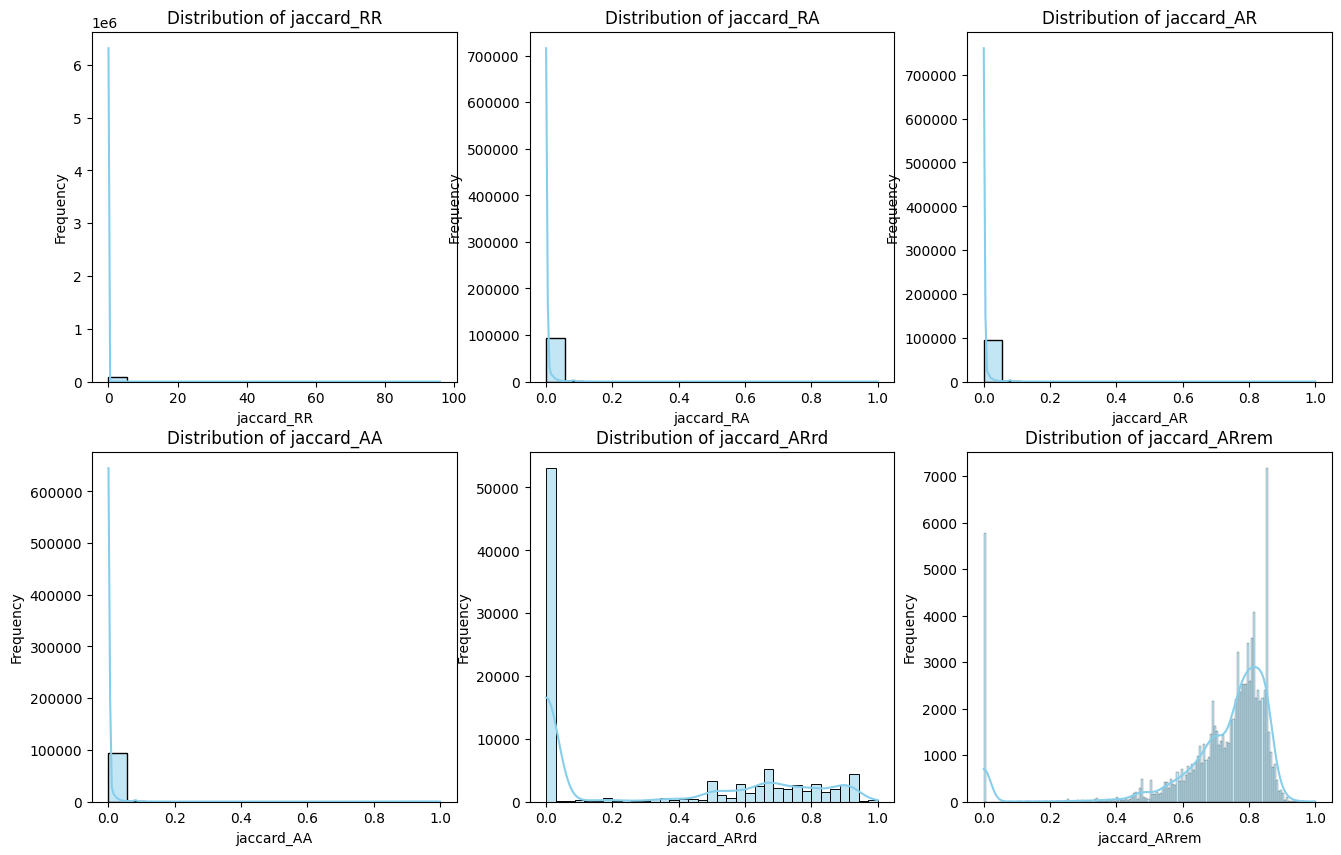

In [ ]:



df_jaccard_numeric = df_jaccard.apply(pd.to_numeric, errors='coerce')

# Creating histograms for each column in df_jaccard_numeric
plt.figure(figsize=(16, 10))

for i, col in enumerate(df_jaccard_numeric.columns, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df_jaccard_numeric[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [ ]:
df_jaccard.skew()

<ipython-input-34-5166002f98a6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_jaccard.skew()


jaccard_RR    305.697029
jaccard_RA     20.860147
jaccard_AR     22.021524
jaccard_AA     23.400011
dtype: float64

##Bivariate Analysis

In [ ]:
df.head()

<ipython-input-36-e18a92a30d59>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_numerical.corr()


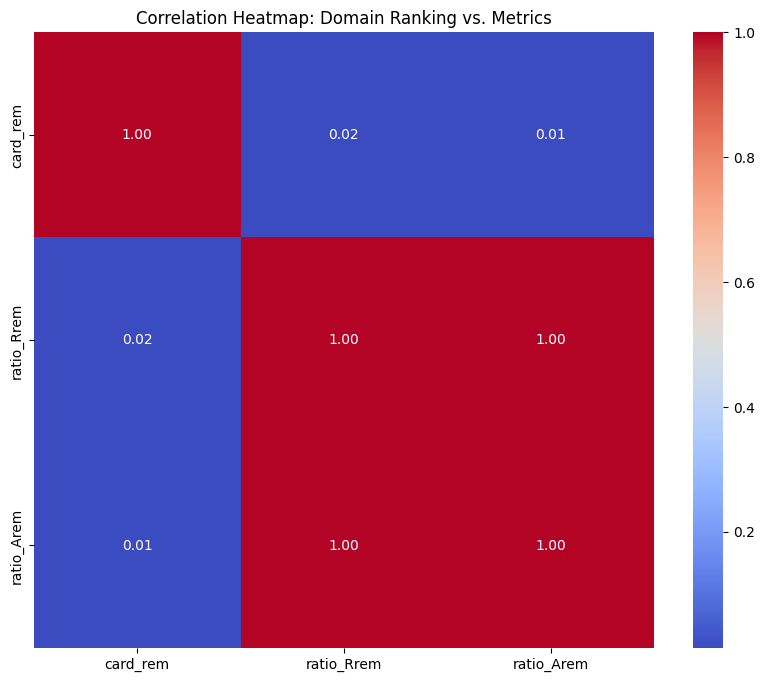

In [ ]:

numerical_columns = ['ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem', 'ratio_Arem']


df_numerical = df[numerical_columns]

# Calculating the correlation matrix
correlation_matrix = df_numerical.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Domain Ranking vs. Metrics')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



# Selecting Jaccard similarity coefficient columns and the label column
jaccard_columns = ['jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA', 'jaccard_ARrd', 'jaccard_ARrem', 'label']
df_jaccard_label = df[jaccard_columns]

# Creating boxplots for each Jaccard similarity coefficient by label category
plt.figure(figsize=(12, 8))

for i, col in enumerate(df_jaccard_label.columns[:-1], start=1):  # Exclude the 'label' column
    plt.subplot(2, 3, i)
    sns.boxplot(x='label', y=col, data=df_jaccard_label)
    plt.title(f'{col} by Label')
    plt.xlabel('Label')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 2 () missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 19 () missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 3 () missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 150 (\x96) missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 139 (\x8b) missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 127 () missing from current font.
  plt.tight_layout()
<ipython-input-38-adb253347dc0>:20: UserWarning: Glyph 30 () missing from current font.
  plt.tight_layo

KeyboardInterrupt: ignored

##Feature Engineering

#creating new feature

In [ ]:
df['mld_res'] = pd.to_numeric(df['mld_res'], errors='coerce')
df['mld.ps_res'] = pd.to_numeric(df['mld.ps_res'], errors='coerce')
df['interaction_term_2'] = df['mld_res'] * df['mld.ps_res']
df['jaccard_sum'] = df['jaccard_RR'] + df['jaccard_RA'] + df['jaccard_AR'] + df['jaccard_AA']
df['weighted_ratio'] = (df['ratio_Rrem'] * df['card_rem'] + df['ratio_Arem']) / 2
# Creating a feature based on differences or ratios between columns
df['ratio_diff'] = (df['ratio_Rrem'] - df['ratio_Arem']) / (df['ratio_Rrem'] + df['ratio_Arem'])

In [ ]:

df['interaction_term_1'] = df['card_rem'] * df['ratio_Rrem']

In [ ]:
# Droping  column after creating the interaction term
df.drop(['card_rem','ratio_Rrem','mld_res','mld.ps_res','jaccard_RR','jaccard_RA','jaccard_AR','jaccard_AA','ratio_Arem'], axis=1, inplace=True)



In [ ]:
df.head()

,domain,ranking,jaccard_ARrd,jaccard_ARrem,label,interaction_term_2,jaccard_sum,weighted_ratio,ratio_diff,interaction_term_1
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,0.8,0.795729,1.0,0.0,0.0,1022.138888,0.001551,1936.999998
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0.768577,1.0,0.0,0.0,904.636365,-0.005402,1657.000004
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0.726582,1.0,0.0,0.0,550.821429,0.005865,1029.000000
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0.85964,1.0,0.0,0.0,1981.333333,-0.024870,3372.000000
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0.748971,1.0,0.0,0.0,128.062500,0.091765,232.000000


Domain Length:

In [ ]:
df['domain_length'] = df['domain'].apply(len)


Domain Extension:

In [ ]:
df['domain_extension'] = df['domain'].apply(lambda x: x.split('.')[-1])


Vowel Ratio in Domain:

In [ ]:
def calculate_vowel_ratio(domain):
    vowels = 'aeiou'
    return sum(1 for char in domain if char.lower() in vowels) / len(domain)

df['vowel_ratio'] = df['domain'].apply(calculate_vowel_ratio)


Special Characters Count:

In [ ]:
def count_special_chars(domain):
    special_chars = set("!@#$%^&*()-_=+[]{}|;:'\",.<>/?")
    return sum(1 for char in domain if char in special_chars)

df['special_char_count'] = df['domain'].apply(count_special_chars)


Word Count in Domain:

In [ ]:
def count_words(domain):
    return len(domain.split('/'))

df['word_count'] = df['domain'].apply(count_words)


In [ ]:
df.head()

,domain,ranking,jaccard_ARrd,jaccard_ARrem,label,interaction_term_2,jaccard_sum,weighted_ratio,ratio_diff,interaction_term_1,domain_length,domain_extension,vowel_ratio,special_char_count,word_count
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,0.8,0.795729,1.0,0.0,0.0,1022.138888,0.001551,1936.999998,225,1&login_access=1322408526,0.204444,32,11
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0.768577,1.0,0.0,0.0,904.636365,-0.005402,1657.000004,81,php,0.209877,15,5
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0.726582,1.0,0.0,0.0,550.821429,0.005865,1029.000000,177,dispatch35463256rzr321654641dsf654321874/href/...,0.214689,19,12
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0.85964,1.0,0.0,0.0,1981.333333,-0.024870,3372.000000,60,html,0.300000,8,3
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0.748971,1.0,0.0,0.0,128.062500,0.091765,232.000000,116,com/wp-content/themes/widescreen/includes/temp...,0.198276,13,11


#Missing Values

In [ ]:
df.isnull().sum()

domain                   0
ranking                 52
jaccard_ARrd            86
jaccard_ARrem           88
label                   92
interaction_term_2      82
jaccard_sum             86
weighted_ratio          82
ratio_diff            5713
interaction_term_1      82
domain_length            0
domain_extension         0
vowel_ratio              0
special_char_count       0
word_count               0
dtype: int64

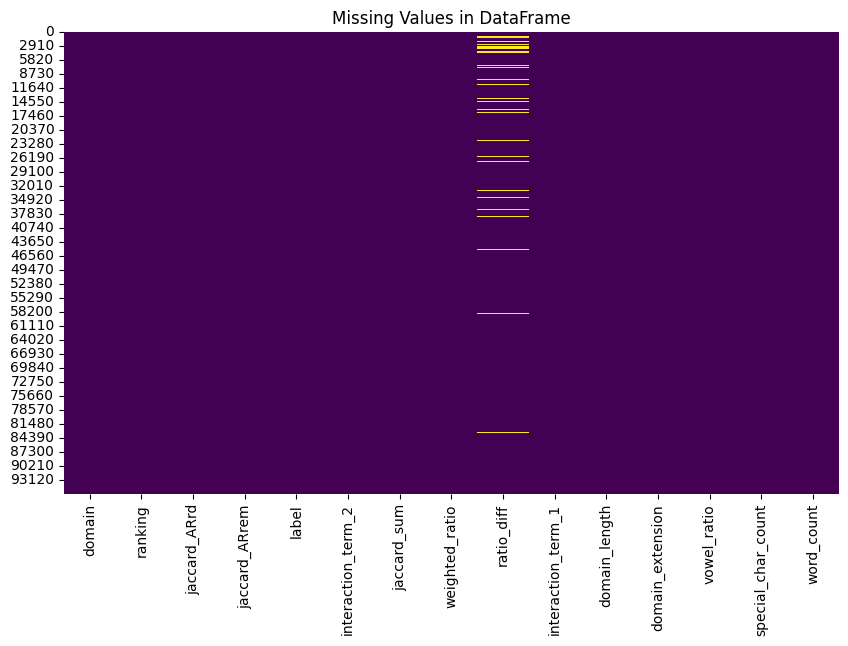

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in DataFrame')
plt.show()

In [ ]:
df.isnull().mean()*100

domain                0.000000
ranking               0.054164
jaccard_ARrd          0.089579
jaccard_ARrem         0.091662
label                 0.095828
interaction_term_2    0.085412
jaccard_sum           0.089579
weighted_ratio        0.085412
ratio_diff            5.950732
interaction_term_1    0.085412
domain_length         0.000000
domain_extension      0.000000
vowel_ratio           0.000000
special_char_count    0.000000
word_count            0.000000
dtype: float64

Text(0, 0.5, 'Percentage of Missing Values')

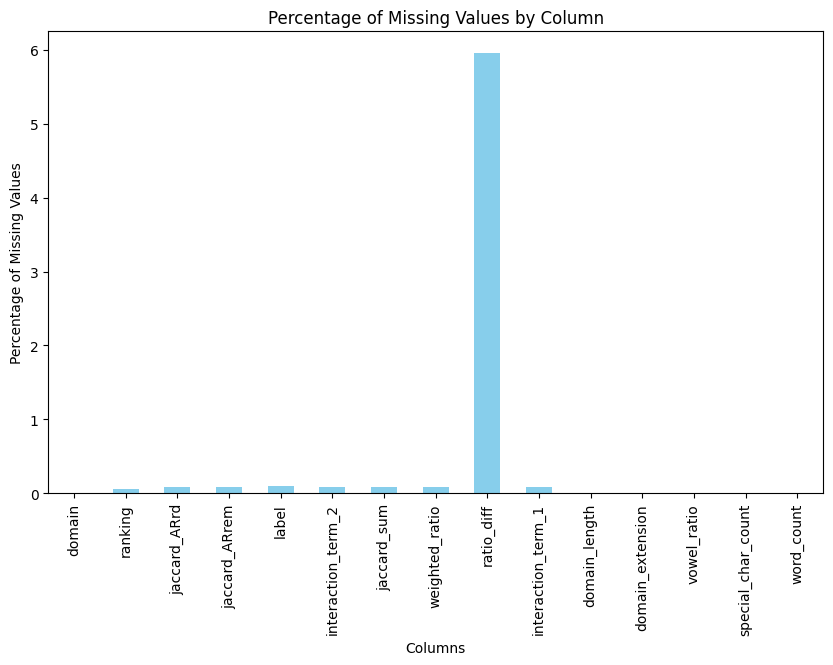

In [ ]:
missing_percentage = df.isnull().mean() * 100

# Plotting the percentage of missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')

In [ ]:
df.skew()

<ipython-input-64-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


label                   0.002190
interaction_term_2    309.714359
jaccard_sum           264.254714
weighted_ratio          3.643959
ratio_diff              3.233030
interaction_term_1      3.692675
domain_length           3.766520
vowel_ratio            -0.040092
special_char_count      3.360504
word_count              2.201133
dtype: float64

<ipython-input-86-565586018093>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew_values = df.skew()


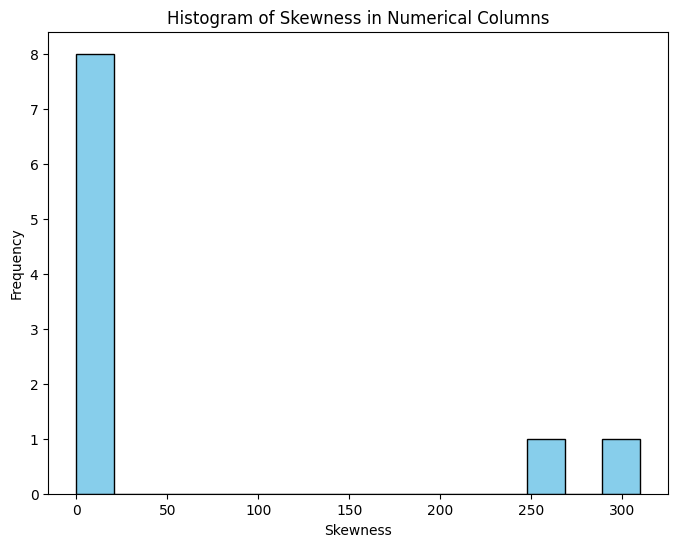

In [ ]:
skew_values = df.skew()

# Plotting the histogram of skewness values
plt.figure(figsize=(8, 6))
plt.hist(skew_values, bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram of Skewness in Numerical Columns')
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.show()


median imputation due to skewness and a relatively small percentage of missing values (< 10%).

In [ ]:
columns_to_impute = ['ranking', 'jaccard_ARrd', 'jaccard_ARrem', 'interaction_term_2',
                     'jaccard_sum', 'weighted_ratio', 'interaction_term_1']

# Convert columns to numeric, coerce errors to NaN
df[columns_to_impute] = df[columns_to_impute].apply(pd.to_numeric, errors='coerce')

# Replace missing values with the median for the specified columns
for col in columns_to_impute:
    median_value = df[col].median()  # Calculate median for the column
    df[col].fillna(median_value, inplace=True)  # Fill missing values with the median



higher percentage of missing values (6%)

In [ ]:
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)

# column for imputation
column_to_impute = ['ratio_diff']

# KNN imputation on the selected column
df[column_to_impute] = imputer.fit_transform(df[column_to_impute])


Mode imputation for a categorical variable like 'label'

In [ ]:
# mode  of the 'label' column
mode_label = df['label'].mode()[0]

# Filling missing values in the 'label' column with the mode
df['label'].fillna(mode_label, inplace=True)


 appling logarithmic transformation to reduce skewness for highly skewed features

In [ ]:
# List of highly skewed features
skewed_features = ['interaction_term_2', 'jaccard_sum', 'weighted_ratio', 'ratio_diff',
                   'interaction_term_1', 'domain_length', 'special_char_count', 'word_count']

# Applying logarithmic transformation to reduce skewness
df[skewed_features] = df[skewed_features].applymap(lambda x: np.log1p(x))


<ipython-input-19-0b75aef8ff3b>:6: RuntimeWarning: divide by zero encountered in log1p
  df[skewed_features] = df[skewed_features].applymap(lambda x: np.log1p(x))


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96005 entries, 0 to 96004
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   domain              96005 non-null  object 
 1   ranking             95953 non-null  object 
 2   jaccard_ARrd        95919 non-null  object 
 3   jaccard_ARrem       95917 non-null  object 
 4   label               95913 non-null  float64
 5   interaction_term_2  95923 non-null  float64
 6   jaccard_sum         95919 non-null  float64
 7   weighted_ratio      95923 non-null  float64
 8   ratio_diff          90292 non-null  float64
 9   interaction_term_1  95923 non-null  float64
 10  domain_length       96005 non-null  int64  
 11  domain_extension    96005 non-null  object 
 12  vowel_ratio         96005 non-null  float64
 13  special_char_count  96005 non-null  int64  
 14  word_count          96005 non-null  int64  
dtypes: float64(7), int64(3), object(5)
memory usage: 11.0

#Checking data after filling of missing values

In [ ]:
df.isnull().sum()

domain                0
ranking               0
jaccard_ARrd          0
jaccard_ARrem         0
label                 0
interaction_term_2    0
jaccard_sum           0
weighted_ratio        0
ratio_diff            0
interaction_term_1    0
domain_length         0
domain_extension      0
vowel_ratio           0
special_char_count    0
word_count            0
dtype: int64

In [ ]:
df.skew()

<ipython-input-93-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


ranking               -0.346543
jaccard_ARrd           0.481574
jaccard_ARrem         -2.457231
label                  0.004104
interaction_term_2     3.560566
jaccard_sum           16.297310
weighted_ratio        -1.400556
ratio_diff                  NaN
interaction_term_1    -1.374319
domain_length          0.998975
vowel_ratio           -0.040092
special_char_count     0.922447
word_count             0.708836
dtype: float64

In [ ]:
import numpy as np

# List of highly skewed columns
skewed_columns = ['interaction_term_2', 'jaccard_sum', 'weighted_ratio', 'ratio_diff',
                  'interaction_term_1', 'domain_length', 'special_char_count', 'word_count']

# logarithmic transformation
for column in skewed_columns:
    if column in df.columns and df[column].skew() > 1:
        df[column] = np.log1p(df[column])




In [ ]:
df.skew()

<ipython-input-95-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


ranking               -0.346543
jaccard_ARrd           0.481574
jaccard_ARrem         -2.457231
label                  0.004104
interaction_term_2     1.515127
jaccard_sum           10.042264
weighted_ratio        -1.400556
ratio_diff                  NaN
interaction_term_1    -1.374319
domain_length          0.998975
vowel_ratio           -0.040092
special_char_count     0.922447
word_count             0.708836
dtype: float64

##Outliers

ValueError: ignored

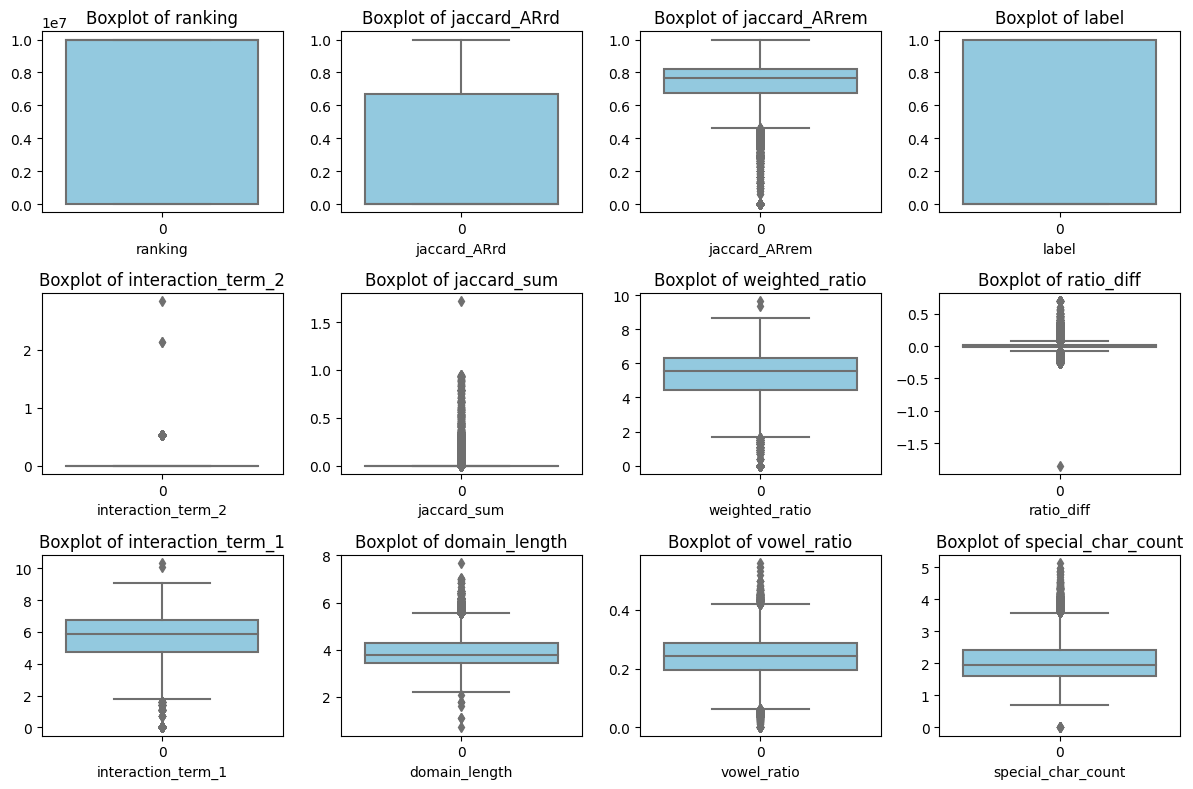

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

#box plots for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

In [ ]:
outliers = {}
numeric_columns = df.select_dtypes(include=['float64', 'int64'])


for column in numeric_columns.columns:

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # IQR
    IQR = Q3 - Q1

    #lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]


    outliers[column] = column_outliers


for column, outlier_values in outliers.items():
    print(f'Outliers in column {column}:')
    print(outlier_values)
    print('\n')


Outliers in column ranking:
Series([], Name: ranking, dtype: float64)


Outliers in column jaccard_ARrd:
Series([], Name: jaccard_ARrd, dtype: float64)


Outliers in column jaccard_ARrem:
8        0.360000
16       0.381579
27       0.000000
30       0.000000
43       0.000000
           ...   
95626    0.133333
95630    0.133333
95686    0.391304
95770    0.000000
95816    0.375000
Name: jaccard_ARrem, Length: 7211, dtype: float64


Outliers in column label:
Series([], Name: label, dtype: float64)


Outliers in column interaction_term_2:
11       0.526589
30       0.526589
33       0.526589
36       0.526589
40       0.526589
           ...   
95999    0.526589
96000    0.526589
96002    0.526589
96003    0.526589
96004    0.526589
Name: interaction_term_2, Length: 19405, dtype: float64


Outliers in column jaccard_sum:
11       0.106769
33       0.002932
36       0.109952
40       0.006380
51       0.106769
           ...   
96000    0.030295
96001    0.010848
96002    0.003096
96003

In [ ]:
df_no_outliers = df.copy()


for column, outlier_values in outliers.items():
    # Removing outliers from the original DataFrame
    df_no_outliers = df_no_outliers[~df_no_outliers[column].isin(outlier_values)]

#modified DataFrame without outliers
df_no_outliers

,domain,ranking,jaccard_ARrd,jaccard_ARrem,label,interaction_term_2,jaccard_sum,weighted_ratio,ratio_diff,interaction_term_1,domain_length,domain_extension,vowel_ratio,special_char_count,word_count
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000.0,0.0,0.768577,1.0,0.0,0.0,6.808638,-0.005417,7.413367,4.406719,php,0.209877,2.772589,1.791759
3,mail.printakid.com/www.online.americanexpress....,10000000.0,0.0,0.859640,1.0,0.0,0.0,7.592030,-0.025184,8.123558,4.110874,html,0.300000,2.197225,1.386294
5,smilesvoegol.servebbs.org/voegol.php,10000000.0,0.0,0.852227,1.0,0.0,0.0,5.833348,-0.023218,6.104793,3.610918,php,0.305556,1.609438,1.098612
6,premierpaymentprocessing.com/includes/boleto-2...,10000000.0,0.0,0.853565,1.0,0.0,0.0,5.702949,-0.010449,6.167516,4.127134,php,0.278689,2.079442,1.386294
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,10000000.0,0.0,0.777622,1.0,0.0,0.0,5.993026,0.010176,6.466145,4.110874,php,0.200000,2.484907,2.079442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95976,www.armchairempire.com/Reviews/XBox/call-cthul...,451501.0,0.0,0.742342,0.0,0.0,0.0,5.619721,0.013354,6.196444,4.276666,htm,0.267606,2.397895,1.609438
95977,www.game-over.net/reviews.php?page=xboxreviews...,10000000.0,0.0,0.793035,0.0,0.0,0.0,6.278897,-0.023583,6.781058,4.060443,php?page=xboxreviews&amp;id=265,0.280702,2.397895,1.098612
95979,www.eurogamer.net/article.php?article_id=61403,5444.0,0.4,0.832392,0.0,0.0,0.0,5.782286,-0.005152,6.184149,3.850148,php?article_id=61403,0.282609,2.079442,1.098612
95980,www.xboxaddict.com/staff_review/12495.html,591792.0,0.0,0.802817,0.0,0.0,0.0,5.942799,-0.021053,6.336826,3.761200,html,0.190476,1.945910,1.386294


#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import string

In [ ]:
import nltk
import re
nltk.download('punkt')
punct=string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
new_df=df_no_outliers.sample(1000)

In [ ]:
new_df.head()

,domain,ranking,jaccard_ARrd,jaccard_ARrem,label,interaction_term_2,jaccard_sum,weighted_ratio,ratio_diff,interaction_term_1,domain_length,domain_extension,vowel_ratio,special_char_count,word_count
60337,www.sigact.org/stoc.html,10000000.0,0.5,0.852349,0.0,0.0,0.0,5.336335,-0.003630,5.620401,3.218876,html,0.166667,1.609438,1.098612
30635,bluraymovies4arab.com/https.www.paypal.com.ar....,10000000.0,0.0,0.798561,1.0,0.0,0.0,7.284089,-0.008399,7.911324,5.129899,php?cmd=_home&dispatch=5885d80a13c0db1f8e&ee=f...,0.232143,3.135494,1.609438
78858,www.freeprogrammingresources.com/visual-basic-...,378009.0,0.0,0.707071,0.0,0.0,0.0,6.038766,-0.016406,6.501290,4.007333,html,0.296296,1.945910,1.098612
15292,sofan.gr/img/sendto.php,10000000.0,0.5,0.835185,1.0,0.0,0.0,5.801615,-0.003032,6.204558,3.178054,php,0.217391,1.609438,1.386294
4772,fivestarmaidservice.com/images/au/https:www.ne...,10000000.0,0.0,0.705409,1.0,0.0,0.0,6.022126,0.021363,6.630683,4.584967,com/,0.298969,2.772589,2.079442


In [ ]:
new_df['domain']=new_df['domain'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

In [ ]:
new_df['domain_extension']=new_df['domain_extension'].apply(lambda x: re.sub('[^a-zA-Z]',' ',x))

In [ ]:
stp_words=nlp.Defaults.stop_words

In [ ]:
def spacy_tokenizer(sent):
  doc=nlp(sent)
  tokens=[word.lemma_.lower().strip() for word in doc]
  tokens=[word for word in tokens if word not in stp_words and word not in punct]
  return(tokens)

In [ ]:
from sklearn.model_selection import train_test_split
X=new_df['domain']
y=new_df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X

60337                             www sigact org stoc html
30635    bluraymovies arab com https www paypal com ar ...
78858    www freeprogrammingresources com visual basic ...
15292                              sofan gr img sendto php
4772     fivestarmaidservice com images au https www ne...
                               ...                        
75661                       www tagtraum com products html
5171     ssl secure www paypa com cmd up    bfcaa  dbfe...
36230    www djjuniormix com br  mpolvora accounts depa...
56616    mmc assess tuwien ac at public v  thermaltreat...
43443                     pvteyegal com newpayment pay htm
Name: domain, Length: 1000, dtype: object

In [ ]:
tfidf_vector=TfidfVectorizer(tokenizer=spacy_tokenizer)
x_train_vec=tfidf_vector.fit_transform(X_train)
x_test_vec=tfidf_vector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,x_train_vec,y_train,x_test_vec,y_test):
    clf.fit(x_train_vec,y_train)
    y_pred = clf.predict(x_test_vec)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,x_train_vec,y_train,x_test_vec,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.96
Precision -  0.9826086956521739
For  KN
Accuracy -  0.65
Precision -  0.6353591160220995
For  NB
Accuracy -  0.8
Precision -  0.7548387096774194
For  DT
Accuracy -  0.895
Precision -  0.8951612903225806
For  LR
Accuracy -  0.915
Precision -  0.9112903225806451
For  RF
Accuracy -  0.945
Precision -  0.9655172413793104
For  AdaBoost
Accuracy -  0.925
Precision -  0.956140350877193
For  BgC
Accuracy -  0.935
Precision -  0.9416666666666667
For  ETC
Accuracy -  0.95
Precision -  0.9739130434782609
For  GBDT
Accuracy -  0.94
Precision -  0.9495798319327731
For  xgb
Accuracy -  0.945
Precision -  0.9736842105263158
